In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


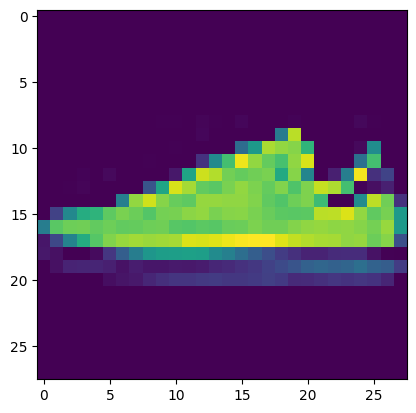

In [ ]:
plt.imshow(x_train[6])

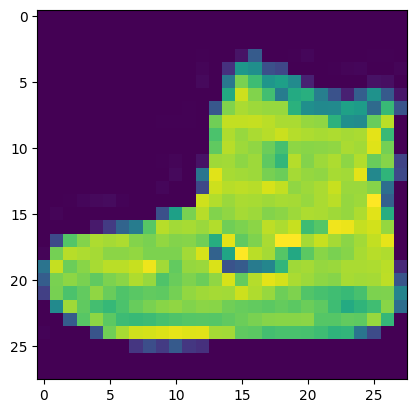

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 28, 28 comes from width, height, 1 comes from the number of channels
# -1 means that the length in that dimension is inferred.
# This is done based on the constraint that the number of elements in an ndarray or Tensor when reshaped must remain the same.

# each image is a row vector (784 elements) and there are lots of such rows (let it be n, so there are 784n elements). So TensorFlow can infer that -1 is n.


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    # 32 filters (default), randomly initialized
    # 3*3 is Size of Filter
    # 28,28,1 size of Input Image
    # No zero-padding: every output 2 pixels less in every dimension
    # in Paramter shwon 320 is value of weights: (3x3 filter weights + 32 bias) * 32 filters
    # 32*3*3=288(Total)+32(bias)= 320


    keras.layers.MaxPooling2D((2,2)),
    # It shown 13 * 13 size image with 32 channel or filter or depth.

    keras.layers.Dropout(0.25),
    # Reduce Overfitting of Training sample drop out 25% Neuron

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Deeper layers use 64 filters
    # 3*3 is Size of Filter
    # Observe how the input image on 28x28x1 is transformed to a 3x3x64 feature map
    # 13(Size)-3(Filter Size )+1(bias)=11 Size for Width and Height with 64 Depth or filtter or channel
    # in Paramter shwon 18496 is value of weights: (3x3 filter weights + 64 bias) * 64 filters
    # 64*3*3=576+1=577*32 + 32(bias)=18496

    keras.layers.MaxPooling2D((2,2)),
    # It shown 5 * 5 size image with 64 channel or filter or depth.

    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    # Deeper layers use 128 filters
    # 3*3 is Size of Filter
    # Observe how the input image on 28x28x1 is transformed to a 3x3x128 feature map
    # It show 5(Size)-3(Filter Size )+1(bias)=3 Size for Width and Height with 64 Depth or filtter or channel
    # 128*3*3=1152+1=1153*64 + 64(bias)= 73856

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    # 128 Size of Node in Dense Layer
    # 1152*128 = 147584

    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
    # 10 Size of Node another Dense Layer
    # 128*10+10 bias= 1290
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

# 1875 is a number of batches. By default batches contain 32 samles.60000 / 32 = 1875


Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8437 - loss: 0.4282 - val_accuracy: 0.8803 - val_loss: 0.3305
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.8786 - loss: 0.3371 - val_accuracy: 0.8895 - val_loss: 0.2956
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.8890 - loss: 0.2984 - val_accuracy: 0.8958 - val_loss: 0.2791
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.8925 - loss: 0.2849 - val_accuracy: 0.9027 - val_loss: 0.2677
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9022 - loss: 0.2657 - val_accuracy: 0.9036 - val_loss: 0.2639
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9049 - loss: 0.2546 - val_accuracy: 0.9033 - val_loss: 0.2733
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9098 - loss: 0.2431 - val_accuracy: 0.9060 - val_loss: 0.2564
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9133 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9081 - loss: 0.2646
Test accuracy: 0.9088000059127808
